# MNIST database of hanwritten digits

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used in the field of machine learning.

It consists of 60,000 training images and 10,000 images for testing.The images of the dataset are 28x80 pixels.

[[Wikipedia]](https://en.wikipedia.org/wiki/MNIST_database)

## Defining a Convolutional Neural Network (CNN) to recognize the digits

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, Dense, Dropout, Input
from keras.layers import MaxPooling2D, Flatten
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import sys
MY_UTILS_PATH = '/Users/robertosouza/GoogleDrive/Jupyter-Scripts/IPT/Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import ipt_utils 

Using TensorFlow backend.


In [2]:
#Loading the data using keras utility
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Printing the shape of the train and test sets
print x_train.shape
print x_test.shape

(60000, 28, 28)
(10000, 28, 28)


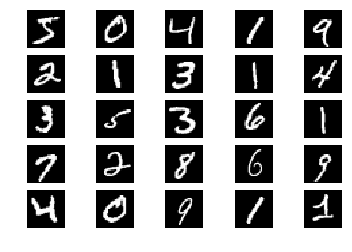

In [3]:
#Displaying a few samples of the training set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_train[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

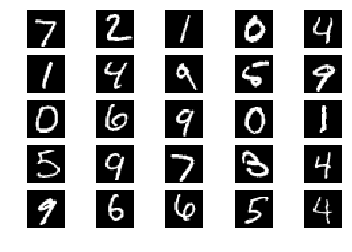

In [4]:
#Displaying a few samples of the test set
fig, ax = plt.subplots(nrows=5, ncols=5)
counter = 0
for row in ax:
    for col in row:
        col.imshow(x_test[counter], cmap = 'gray')
        col.axis("off")
        counter+=1
plt.show()

In [5]:
#Setting training parameters
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
#Normalizing data between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
def my_model(input_shape):
    inputs = Input(input_shape)
    conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu',
                 input_shape=input_shape)(inputs)
    conv2 = Conv2D(64,kernel_size=(3,3),activation="relu")(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv2)
    drop1 = Dropout(0.25)(pool1)
    flat1 = Flatten()(drop1)
    prediction = Dense(10,activation = 'softmax')(flat1)
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

In [7]:
#Building the model and showing a summary
model = my_model(input_shape)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                92170     
Total para

In [8]:
# Checkpoint callback to save model after each improvement along the epochs
checkpoint = ModelCheckpoint('mnist_keras_cnn.model', monitor='val_loss'
                             ,verbose=0,save_weights_only= True,
                             save_best_only=True)

#Training the model
print x_train.shape
print y_train.shape
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split= 0.2,callbacks = [checkpoint])

(60000, 28, 28, 1)
(60000, 10)
Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 90s - loss: 0.3646 - acc: 0.8899 - val_loss: 0.1284 - val_acc: 0.9645
Epoch 2/12
48000/48000 [==============================] - 91s - loss: 0.1159 - acc: 0.9657 - val_loss: 0.0886 - val_acc: 0.9753
Epoch 3/12
48000/48000 [==============================] - 90s - loss: 0.0861 - acc: 0.9744 - val_loss: 0.0731 - val_acc: 0.9798
Epoch 4/12
48000/48000 [==============================] - 91s - loss: 0.0716 - acc: 0.9783 - val_loss: 0.0663 - val_acc: 0.9817
Epoch 5/12
48000/48000 [==============================] - 93s - loss: 0.0630 - acc: 0.9815 - val_loss: 0.0632 - val_acc: 0.9815
Epoch 6/12
48000/48000 [==============================] - 93s - loss: 0.0572 - acc: 0.9825 - val_loss: 0.0579 - val_acc: 0.9832
Epoch 7/12
48000/48000 [==============================] - 96s - loss: 0.0517 - acc: 0.9851 - val_loss: 0.0581 - val_acc: 0.9836
Epoch 8/12
48000/48000 

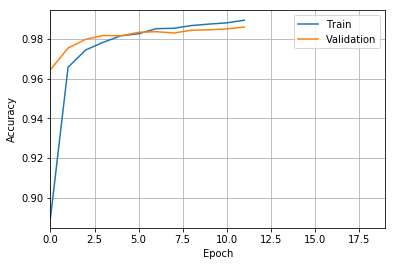

In [9]:
#Plot accuracy history
plt.plot(history.history['acc'], label = "Train")
plt.plot(history.history['val_acc'],label = "Validation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.xlim(0,19)
plt.grid()
plt.show()

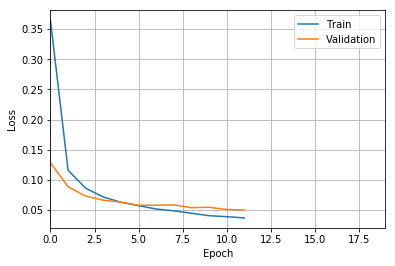

In [10]:
#Plot the loss history
plt.plot(history.history['loss'], label = "Train")
plt.plot(history.history['val_loss'],label = "Validation")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.xlim(0,19)
plt.grid()
plt.show()

In [11]:
#Load the best_model during training
best_model = my_model(input_shape)
best_model.load_weights('mnist_keras_cnn.model')

In [12]:
#Evaluate the model on the test set
score = best_model.evaluate(x_test, y_test, verbose=0)
print 'Test loss: %f' %score[0]
print 'Test accuracy: %f' %score[1]

Test loss: 0.040077
Test accuracy: 0.986300


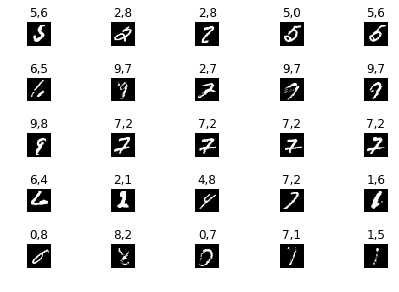

In [13]:
# Run predicition
ypred = best_model.predict(x_test).argmax(axis = 1)
y_test2 = y_test.argmax(axis = 1)

# See samples where prediction failed
indexes = np.where(ypred!=y_test2)[0][::-1]

#Display some of the errors
x_test2 = x_test.reshape(-1,28,28)
fig, ax = plt.subplots(nrows=5, ncols=5)
plt.tight_layout()
counter = 0
for row in ax:
    for col in row:
        aux = indexes[counter]
        col.imshow(x_test2[aux], cmap = 'gray')
        col.axis("off")
        col.set_title("%d,%d" %(y_test2[aux],ypred[aux]))
        counter+=1
plt.show()

(10000, 28, 28, 1)


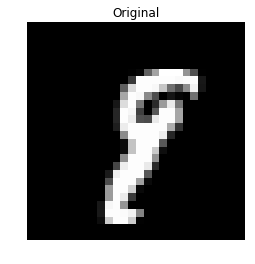

/Users/robertosouza/Documents/virtualenv/venv02/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  if sys.path[0] == '':


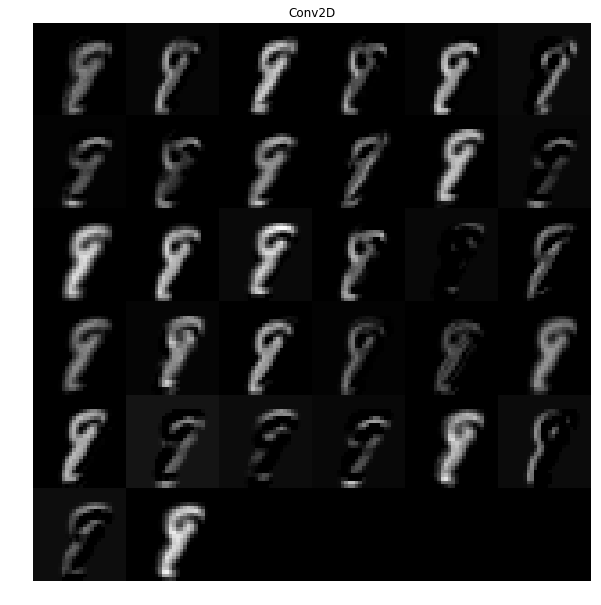

In [14]:
sn = indexes[10]
plt.figure()
print x_test.shape
plt.imshow(x_test[sn,:,:,0],cmap = 'gray')
plt.axis('off')
plt.title("Original")
plt.show()
ncols = 6
H,W = 10,50

#Showing the convolutional layer outputs
intermediate_layer_model = Model(input=model.input,output=model.layers[1].output)
intermediate_output = intermediate_layer_model.predict(x_test[sn][np.newaxis,:,:,:])
sub_dim = intermediate_output.shape[1]
name = str(model.layers[1]).split('.')[3].split(" ")[0]
fig =plt.figure(figsize=(H,W))
aux = intermediate_output[0,:,:,:].transpose(2,0,1)
mos = ipt_utils.mosaic(aux,ncols)
plt.imshow(mos,cmap = 'gray')
plt.axis('off')
plt.title(name)
plt.show()

/Users/robertosouza/Documents/virtualenv/venv02/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  


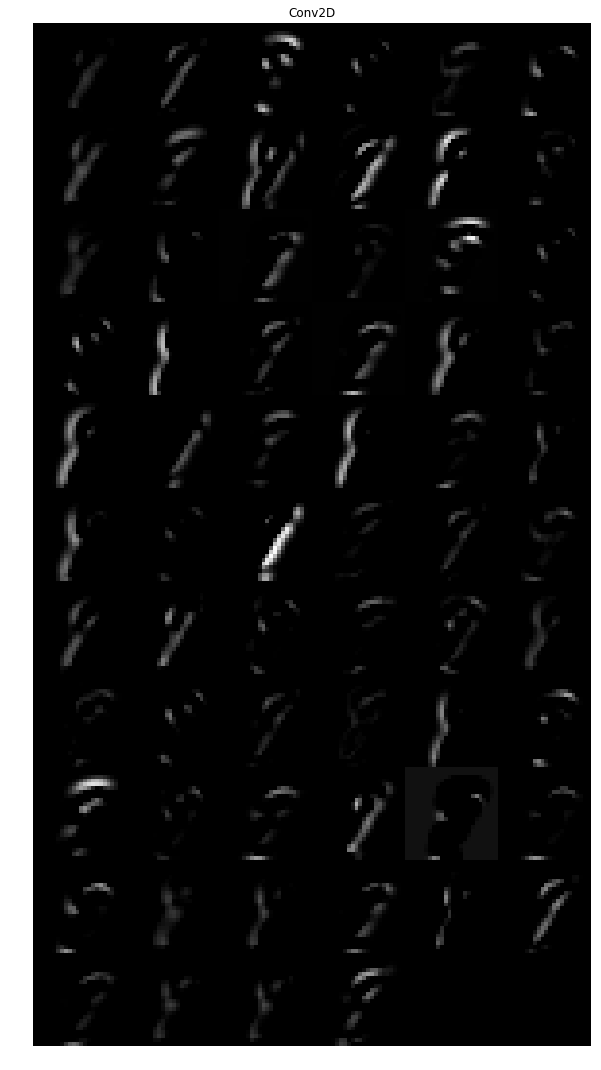

In [15]:
#Showing the convolutional layer outputs
intermediate_layer_model = Model(input=model.input,output=model.layers[2].output)
intermediate_output = intermediate_layer_model.predict(x_test[sn][np.newaxis,:,:,:])
sub_dim = intermediate_output.shape[1]
name = str(model.layers[2]).split('.')[3].split(" ")[0]
fig =plt.figure(figsize=(H,W))
aux = intermediate_output[0,:,:,:].transpose(2,0,1)
mos = ipt_utils.mosaic(aux,ncols)
plt.imshow(mos,cmap = 'gray')
plt.axis('off')
plt.title(name)
plt.show()

/Users/robertosouza/Documents/virtualenv/venv02/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ma..., inputs=Tensor("in...)`
  


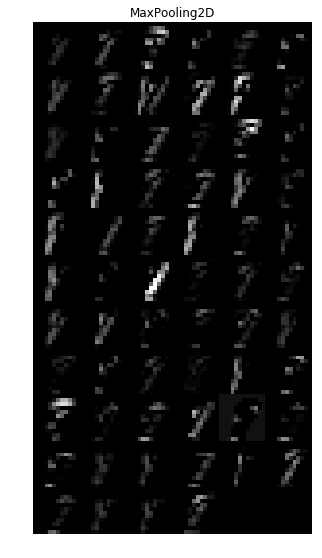

In [16]:
#Showing the convolutional layer outputs
intermediate_layer_model = Model(input=model.input,output=model.layers[3].output)
intermediate_output = intermediate_layer_model.predict(x_test[sn][np.newaxis,:,:,:])
sub_dim = intermediate_output.shape[1]
name = str(model.layers[3]).split('.')[3].split(" ")[0]
H = H/2
W = W/2
fig =plt.figure(figsize=(H,W))
aux = intermediate_output[0,:,:,:].transpose(2,0,1)
mos = ipt_utils.mosaic(aux,ncols)
plt.imshow(mos,cmap = 'gray')
plt.axis('off')
plt.title(name)
plt.show()

/Users/robertosouza/Documents/virtualenv/venv02/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("dr..., inputs=Tensor("in...)`
  


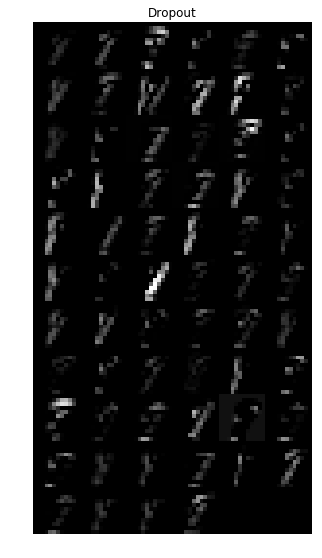

In [17]:
#Showing the convolutional layer outputs
intermediate_layer_model = Model(input=model.input,output=model.layers[4].output)
intermediate_output = intermediate_layer_model.predict(x_test[sn][np.newaxis,:,:,:])
sub_dim = intermediate_output.shape[1]
name = str(model.layers[4]).split('.')[3].split(" ")[0]
fig =plt.figure(figsize=(H,W))
aux = intermediate_output[0,:,:,:].transpose(2,0,1)
mos = ipt_utils.mosaic(aux,ncols)
plt.imshow(mos,cmap = 'gray')
plt.axis('off')
plt.title(name)
plt.show()